# <font color='navy'> **Resistencia a la Compresión del Concreto** </font> 
## <font color='navy'> **(Regresión)** </font> 

**Elaborado por:** Scarlett Magdaleno Gatica.

El objetivo de este Notebook es realizar un análisis exploratorio y aplicar técnicas de procesamiento al conjunto de datos 'Concrete Compressive Strength' con el fin de construir posteriormente un modelo de Regresión que permita predecir la resistencia a la compresión del concreto.

El [dataset](https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength) se ha obtenido del UC Irvine Machine Learning Repository y fue creado por el Dr. I-Cheng Yeh. Este conjunto de datos consta de los siguientes 9 atributos:


**Variables independientes:** 
1. **Cement**: Kilogramos de cemento por metro cúbico (kg/m³).
2. **Blast Furnace Slag**: Kilogramos de escoria de alto horno por metro cúbico (kg/m³).
3. **Fly Ash**: Kilogramos de ceniza volante por metro cúbico (kg/m³).
4. **Water**: Kilogramos de agua por metro cúbico (kg/m³).
5. **Superplasticizer**: Kilogramos de superplastificante por metro cúbico (kg/m³).
6. **Coarse Aggregate**: Kilogramos de agregados gruesos por metro cúbico (kg/m³).
7. **Fine Aggregate**: Kilogramos de agregados finos por metro cúbico (kg/m³).
8. **Age**: Edad del concreto en días.

**Variable dependiente:**

9. **Concrete compressive strength**: resistencia a la compresión del concreto en megapascales (MPa). 

### <font color='purple'> **Estructura del Notebook** </font> 

La estructura del Notebook es la siguiente.

1. **Análisis Exploratorio de los Datos**
2. **Procesamiento de los Datos**
   1. Limpieza de Datos
   2. Extracción de características
   3. Selección de características
      1. Correlación de Pearson
      2. Selección Hacia Adelante
   4. Selección del conjunto de variables independientes y el modelo más eficaz
      1. Evaluación de X_original
      2. Evaluación de X_max_CCP
      3. Evaluación de X_extracted
      4. Evaluación de X_plus_extracted
      5. Evaluación de X_max_CCP_extracted
      6. Evaluación de X_ffs
      7. Selección final de variables independientes y modelo más eficaz
3. **Construcción de los modelos**
   1. Partición de datos en datos de entrenamiento y datos de prueba
   2. Construcción del modelo base
   3. Construcción del modelo final
4. **Evaluación de los modelos**
   1. K-fold cross-validation
      1. K-fold cross-validation en el modelo base
      2. K-fold cross-validation en el modelo final
   2. Métricas de evaluación
      1. Métricas del modelo base
      2. Métricas del modelo final
5. **Conclusiones**
6. **Referencias**

Importamos las librerías.

In [1]:
# Manejo de datos
import numpy as np
import pandas as pd

# Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt

# Partición de datos (entrenamiento y prueba)
from sklearn.model_selection import train_test_split

#Extracción de características
from sklearn.feature_selection import mutual_info_regression
from itertools import combinations
import statsmodels.api as sm

#Selección de características
from mlxtend.feature_selection import SequentialFeatureSelector

# Construcción del modelo
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor

#Regresion
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

#Evaluación
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mostrar dataframes 
from IPython.display import display, HTML


Importamos el dataset en un DataFrame _df_.

In [2]:
# Carga los datos en un dataframe de pandas:
df = pd.read_csv('Concrete_Data.csv')

### <font color='navy'> **1. Análisis Exploratorio de los Datos** </font> 

En este paso se buscará comprender los datos mediante la inspección de su estructura e identificación de valores faltantes, renglones duplicados y valores atípicos.

In [3]:
display(df.head())

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Compressive Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Se revisa el **tamaño** del dataset.

In [4]:
df.shape

(1030, 9)

Se revisa si existen columnas con **valores nulos**.

In [5]:
display(df.isnull().any())

Cement                           False
Blast Furnace Slag               False
Fly Ash                          False
Water                            False
Superplasticizer                 False
Coarse Aggregate                 False
Fine Aggregate                   False
Age                              False
Concrete Compressive Strength    False
dtype: bool

Se revisa si hay **renglones duplicados**.

In [6]:
display(df.duplicated().sum())

25

**Observación:**
+ Hay 25 renglones duplicados.

Se revisa la **información de los datos**.

In [7]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete Compressive Strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


None

**Observación:**
+ Todos los datos son cuantitativos. Así mismo, todas las variables son continuas a excepción de _Age_. 

In [8]:
display(df.nunique())

Cement                           278
Blast Furnace Slag               185
Fly Ash                          156
Water                            195
Superplasticizer                 111
Coarse Aggregate                 284
Fine Aggregate                   302
Age                               14
Concrete Compressive Strength    845
dtype: int64

Se revisa la **estructura descriptiva** de los datos.

In [9]:
#(Por razones de visualización se muestran los atributos como renglones)
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Concrete Compressive Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


**Observación:**

Note que la variable _Age_ no está limitada a valores discretos específicos y puede tomar una amplia gama de valores en un rango continuo de tiempo (1 a 365 días), por lo tanto es razonable considerarla como continua en el análisis de regresión ya que representa una cantidad continua en el tiempo. 

Se observan los **histogramas**.

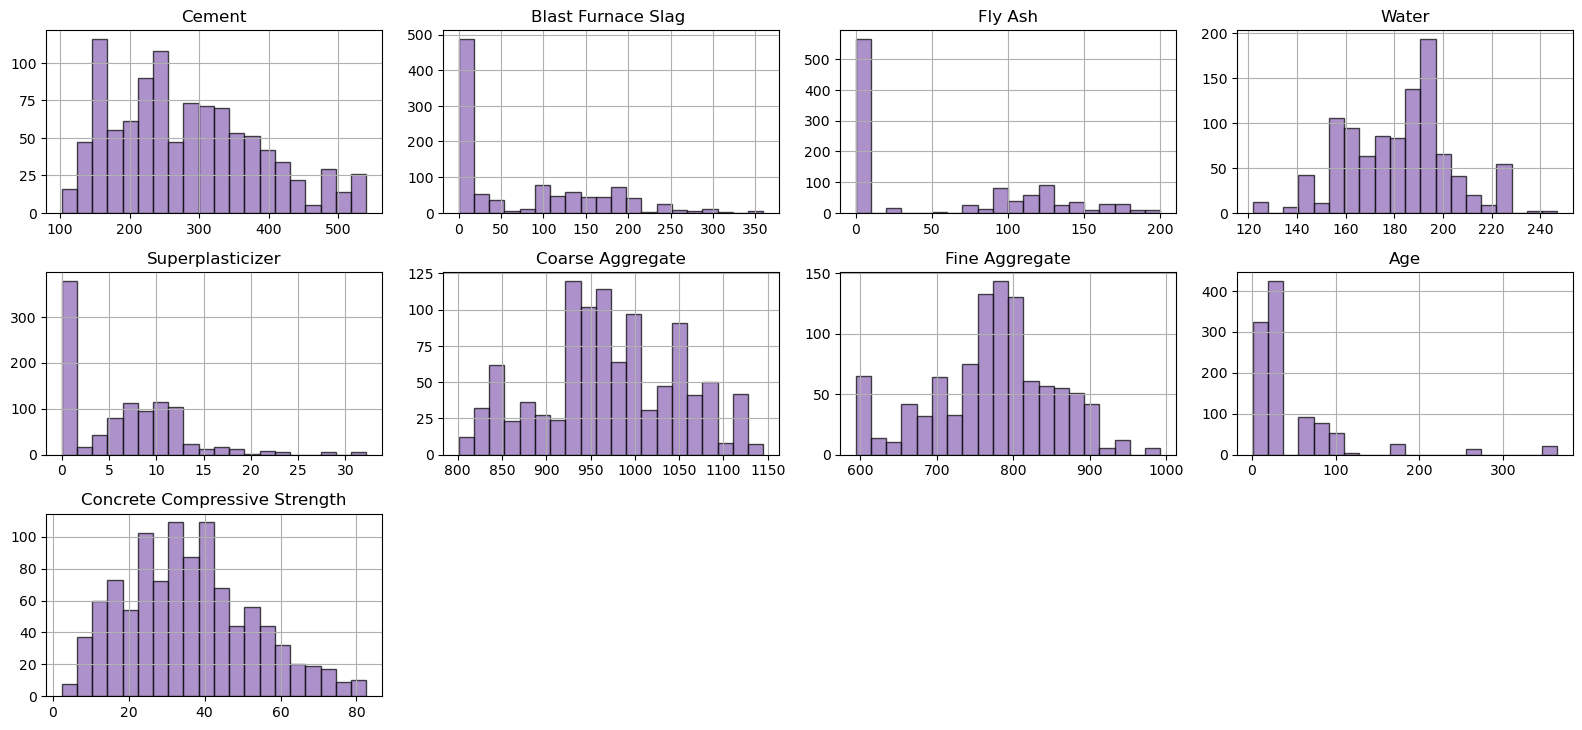

In [10]:
df.hist(bins=20, figsize=(16, 12), color='#8a63b4', 
        edgecolor='black', alpha=0.7, layout=(5, 4))

plt.tight_layout()  # Ajusta el espaciado para evitar superposiciones
plt.show()

**Observaciones:**

+ Las variables _Cement_, _Water_, _Coarse Aggregate_, _Fine Aggregate_ y _Concrete Compressive Strength_ parecen tener una distribución aproximadamente normal.


Se observa el **gráfico de dispersión por pares**.

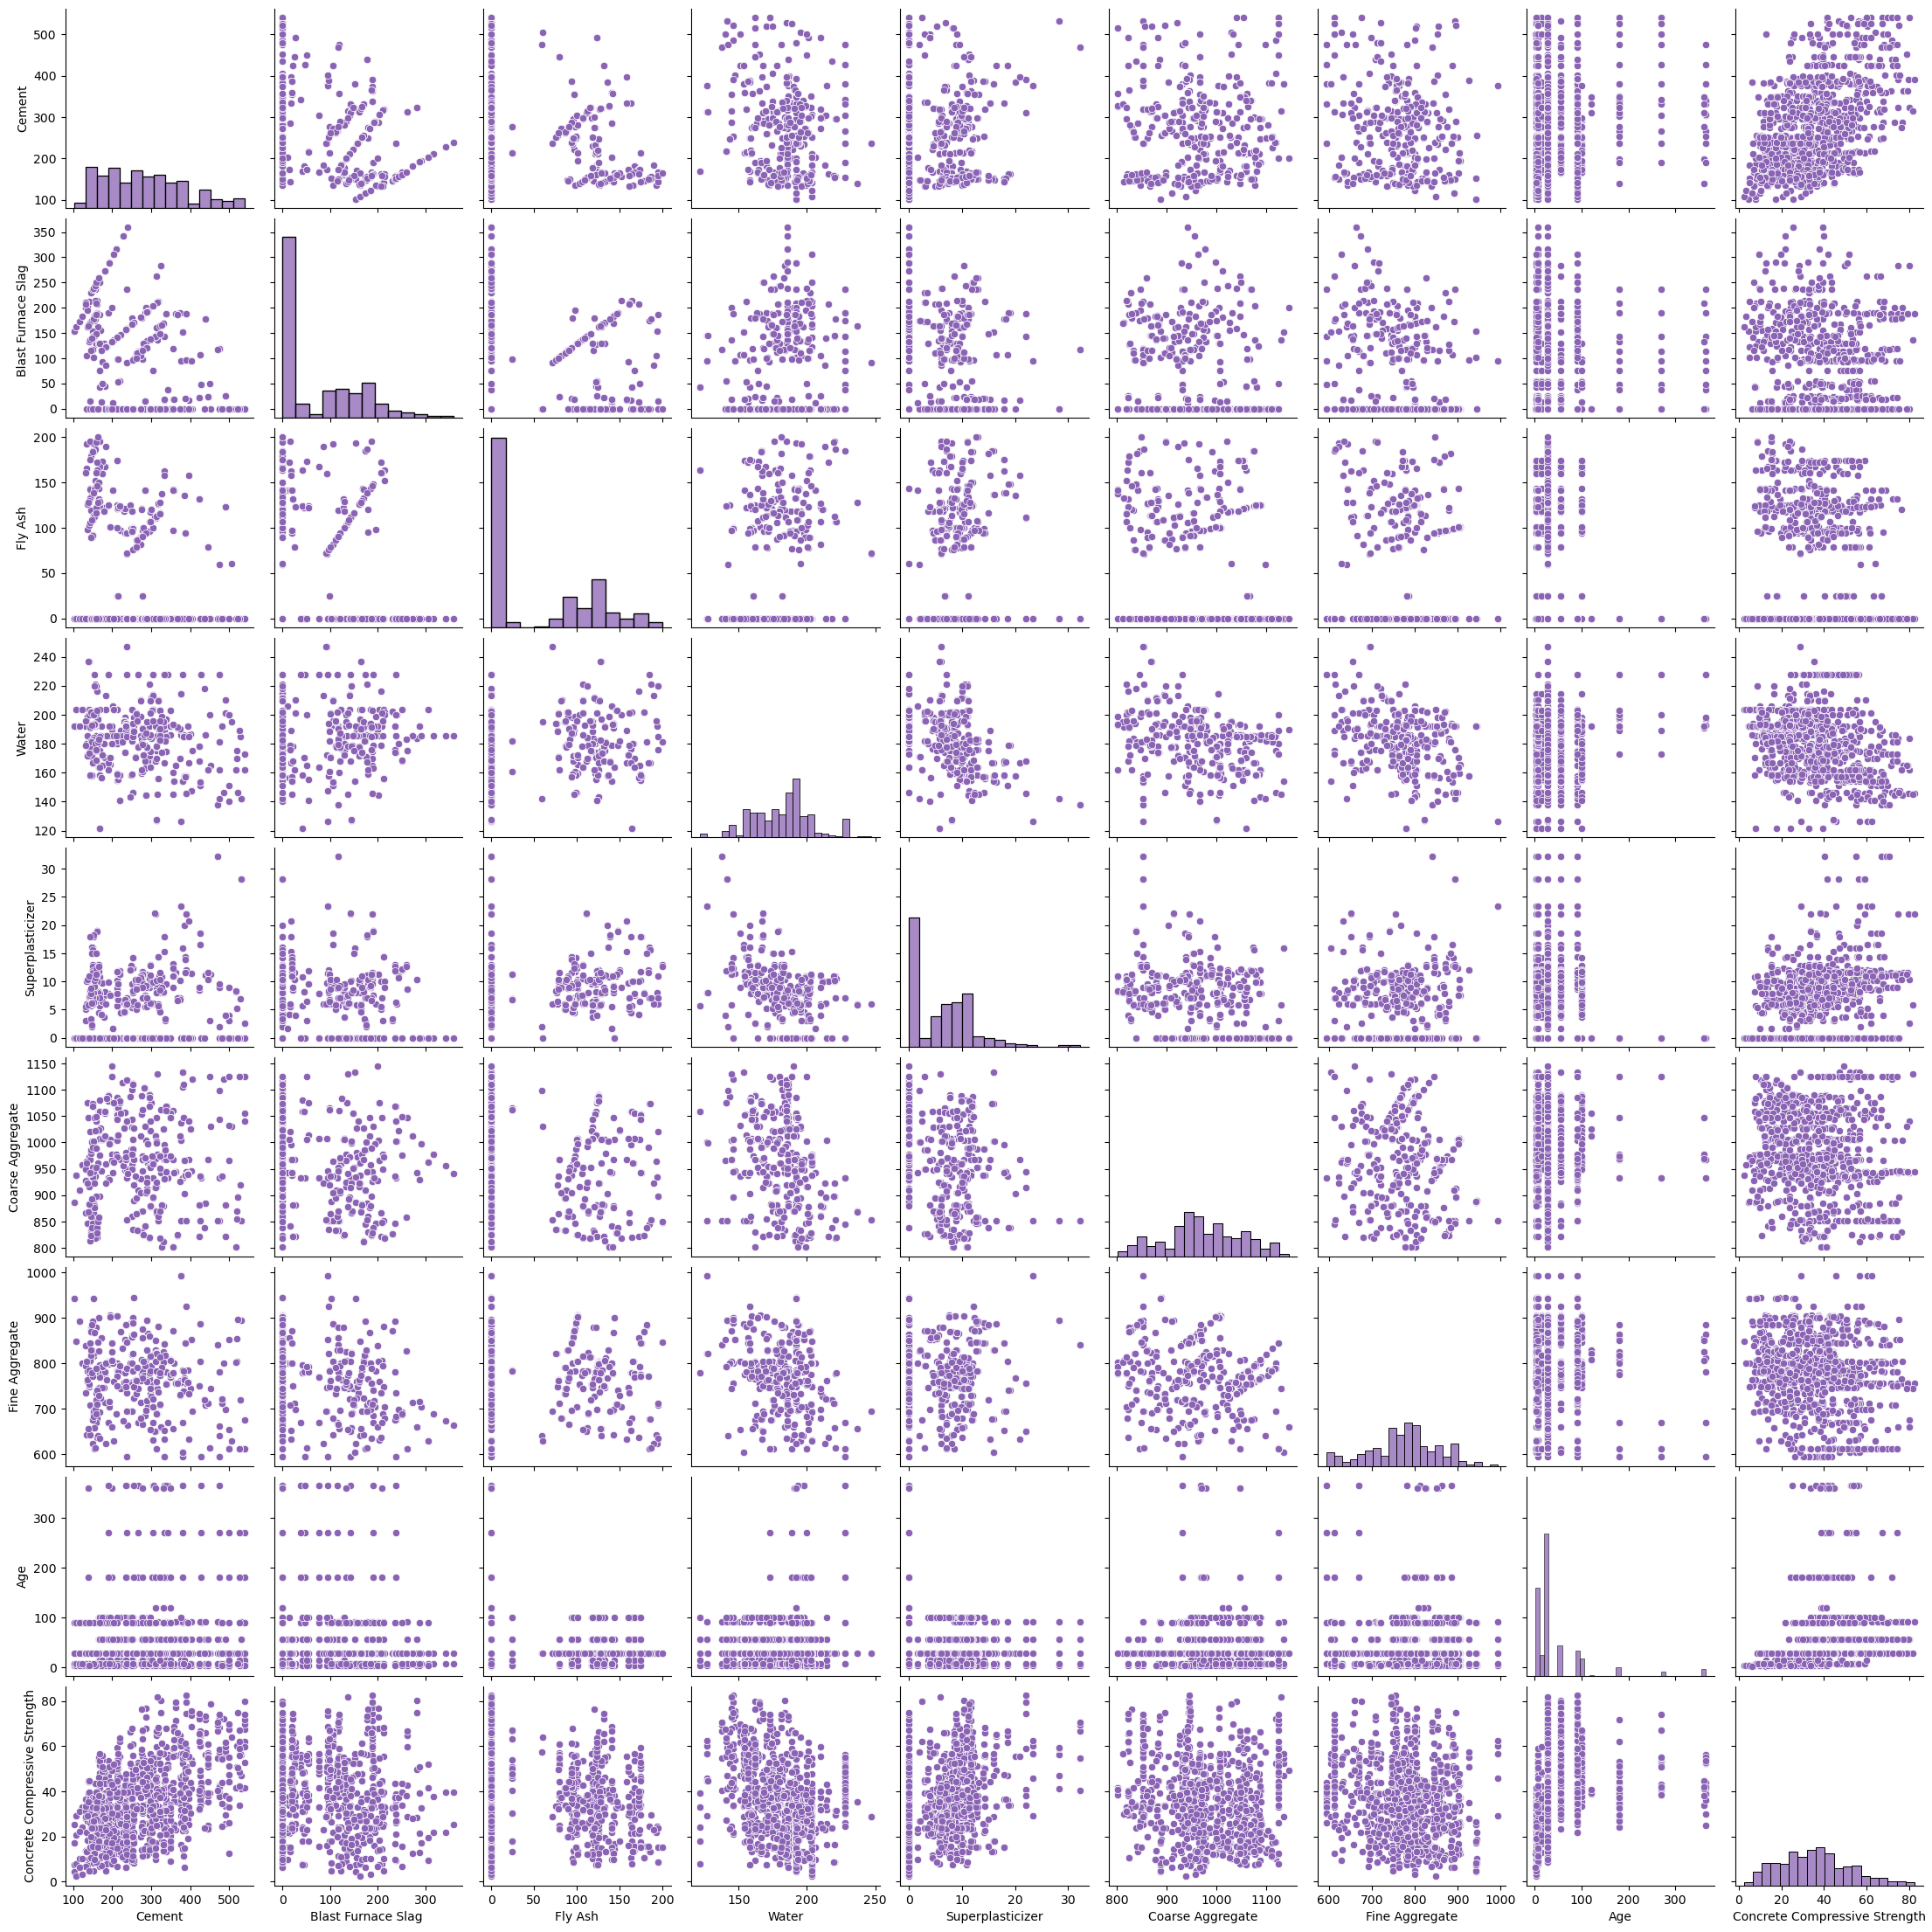

In [11]:
#Creamos un pairplot el cual traza relaciones por pares en un dataset
color = "#8a63b4"
sns.pairplot(df, diag_kws={"color": color}, plot_kws={"color": color})

**Observaciones:**

+ Al observar la última fila del pairplot, podemos analizar la relación entre cada variable independiente y la variable dependiente (_Concrete Compressive Strength_). Parece que estas relaciones no son lineales de manera individual. Sin embargo, podría ser posible que exista una relación lineal con la variable dependiente cuando se toman en cuenta las interacciones entre las variables independientes, ya que la regresión lineal multivariada permite incluir términos de interacción para capturar estas relaciones lineales.  Por lo tanto, a partir de este gráfico aún no podemos llegar a una conclusión con respecto a la suposición de linealidad.

+ No parece haber relaciones lineales entre las variables independientes. La relación más cercana a una linealidad se observa entre las variables 'Cement' y 'Concrete Compressive Strength', ya que a medida que aumenta la cantidad de cemento, también lo hace la resistencia a la compresión del concreto. Sin embargo, esta relación no se ajusta a una línea recta debido a la alta variabilidad de los datos.

Se observan los **diagramas de violín** de las variables.

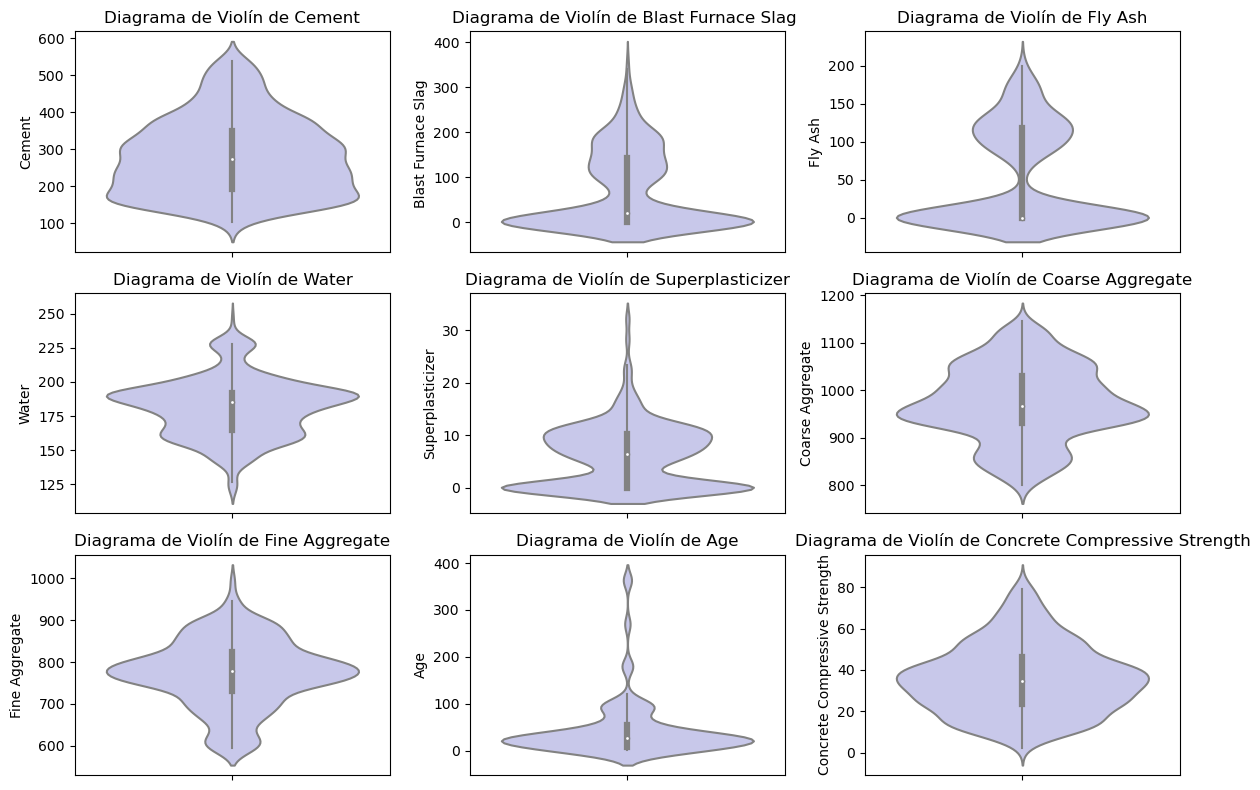

In [12]:
# Configuramos el diseño de la cuadrícula de subfiguras (3x3)
num_filas = 3 
num_columnas = 3  
fig, axs = plt.subplots(num_filas, num_columnas, figsize = (12, 8))
fig.subplots_adjust(hspace = 1)  # Ajusta el espacio vertical entre subfiguras

# Itera a través de las variables y traza diagramas de violín en las subfiguras
for i, variable in enumerate(df):
    fila = i // num_columnas
    columna = i % num_columnas
    sns.violinplot(data = df, y = variable, ax = axs[fila, columna], color = '#c2c2f0')
    axs[fila, columna].set_title(f'Diagrama de Violín de {variable}')

plt.tight_layout() # Ajusta el espaciado para evitar superposiciones
plt.show()

**Observación:**

+ La variable _Age_ presenta valores atípicos, sin embargo, estos corresponden a datos recolectados de concretos con pocos días de edad. No obstante, es importante considerar también los datos de concretos con edades mayores, ya que de lo contrario, el modelo podría sobreajustarse y limitarse a predecir únicamente concretos con pocos días de edad

Observemos la a relación lineal entre las variables mediante la **matriz de correlación de Pearson**.

<Axes: >

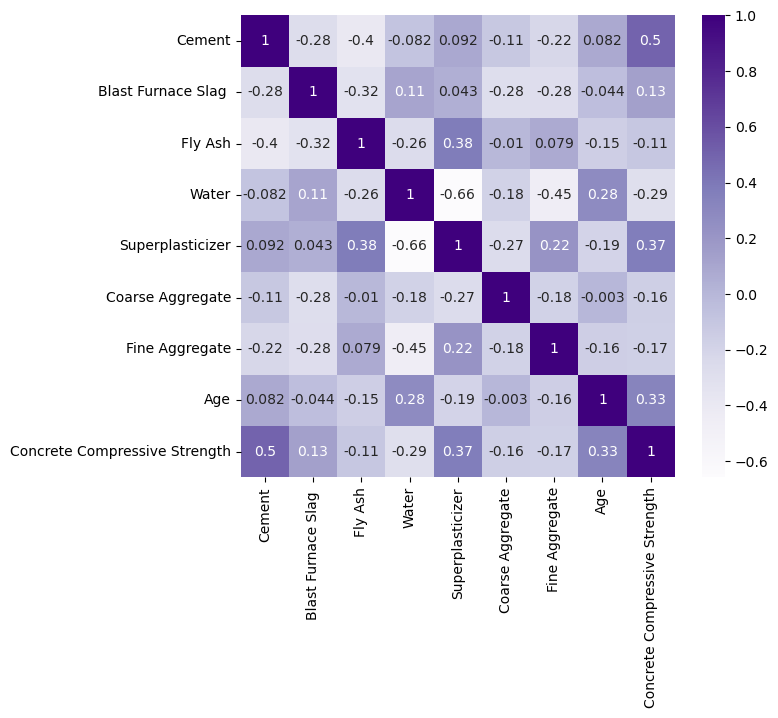

In [13]:
cor = df.corr()

plt.figure(figsize=(7,6))

colormap = sns.color_palette("Purples", as_cmap=True)
sns.heatmap(cor, annot=True, cmap=colormap)

**Observaciones:**

+ No parece haber una correlación muy grande entre cada variable independiente y la variable dependiente.

### <font color='navy'> **2. Procesamiento de los Datos** </font> 

El objetivo de esta sección será limpiar los datos y realizar su procesamiento, guardando los conjuntos de variables independientes obtenidos en diferentes etapas. Posteriormente, se evaluarán los modelos generados y se elegirá el conjunto que obtenga los mejores resultados.

#### <font color='purple'> **2.1. Limpieza de Datos** </font> 

**Eliminación de renglones duplicados**

In [14]:
df = df.drop_duplicates()
df.shape

(1005, 9)

#### <font color='purple'> **2.2. Extracción de características** </font>

La extracción de características es un subproceso de la ingeniería de características que se centra en la creación de nuevas características a partir de las existentes. 

Separamos las variables independientes de la variable dependiente.

In [15]:
X = df.drop('Concrete Compressive Strength', axis=1)  # Variables dependientes
y = df['Concrete Compressive Strength']  # Variable independiente

<font color='olive'> **_X_original_:** </font> Guardamos las variables independientes originales en la variable _X_original_.

In [16]:
X_original = X.copy()

**Definiciones importantes:**

+ **Sinergia entre los predictores:** En el contexto del análisis de regresión y la modelización estadística, la sinergia entre los predictores se refiere a la idea de que dos o más variables predictoras (variables independientes) en un modelo pueden tener un efecto conjunto o interactuar de manera conjunta para influir en la variable dependiente de una manera que no puede ser completamente explicada por la suma de sus efectos individuales.

    La sinergia indica que la combinación de dos o más variables predictoras tiene un efecto en la variable dependiente que es mayor o diferente de lo que se esperaría si se consideraran individualmente. En otras palabras, la influencia de las variables predictoras en la variable dependiente es mayor cuando están juntas en el modelo que cuando se consideran por separado.
    
+ **Término de interacción:** Los términos de interacción son útiles para capturar relaciones no lineales o situaciones en las que el efecto de una variable independiente depende de otra. Su inclusión en un modelo puede mejorar la capacidad del modelo para ajustarse a los datos y comprender las complejas relaciones entre las variables.

+ **OLS (Ordinary Least Squares) Regression Analysis:** También conocido como análisis de regresión por mínimos cuadrados ordinarios, es una técnica estadística utilizada en el campo de la regresión. Su objetivo principal es modelar y analizar la relación entre una variable dependiente (variable de respuesta) y una o más variables independientes (variables predictoras o explicativas) mediante la construcción de una función lineal.

+ **Valor p (p-value):** El valor p del estadístico t es una herramienta fundamental en el análisis de regresión que ayuda a determinar si un coeficiente de regresión es estadísticamente significativo, lo que a su vez ayuda a evaluar la importancia de las variables independientes en la predicción de la variable dependiente. Si el valor de p es mayor a 0.05, se considera que la variable no tiene un efecto significativo en la variable dependiente; por el contrario, si p es menor a 0.05, indica una relación significativa entre la variable independiente y la variable dependiente.

+ **R² (Coeficiente de Determinación):** El coeficiente de determinación es una métrica estadística utilizada en el análisis de regresión para medir la proporción de la variabilidad en la variable dependiente que es explicada por el modelo de regresión. En otras palabras, R² proporciona una medida de cuánta variación en la variable dependiente se puede atribuir a las variables independientes incluidas en el modelo.

Comprobaremos si existe sinergia entre los predictores. Para esto observemos de nuevo la matriz de correlación de Pearson.

<Axes: >

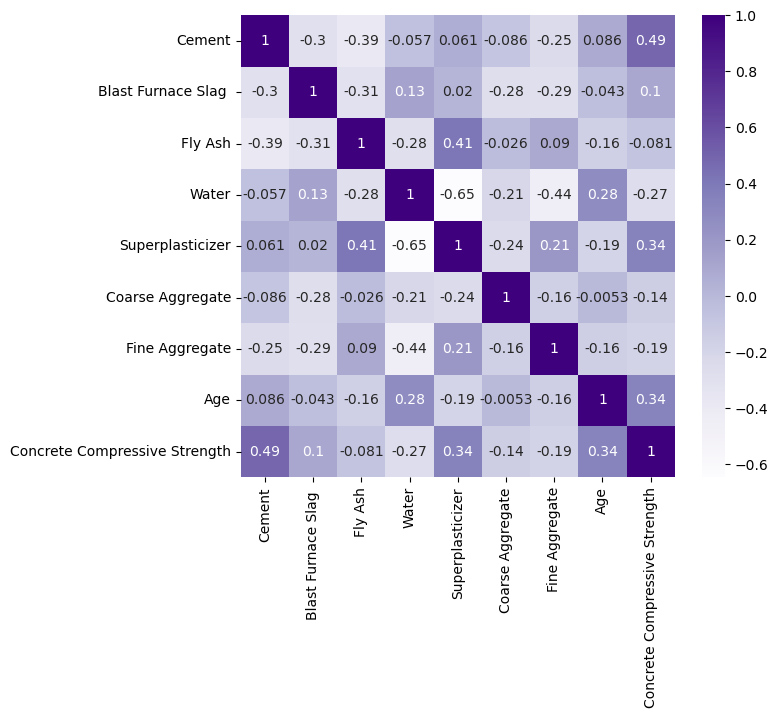

In [17]:
cor = df.corr()

plt.figure(figsize=(7,6))

colormap = sns.color_palette("Purples", as_cmap=True)
sns.heatmap(cor, annot=True, cmap=colormap)

Ahora obtendremos la correlación de Pearson entre las variables independientes y la variable dependiente, y las ordenaremos.

In [18]:
# Se obtiene la correlación
correlation_with_y = X.corrwith(y)

# Se ordenan las variables independientes según su correlación
correlation_with_y = correlation_with_y.abs().sort_values(ascending=False)

Seleccionamos las 4 variables con la correlación más alta.

In [19]:
selected_features = correlation_with_y.head(4)

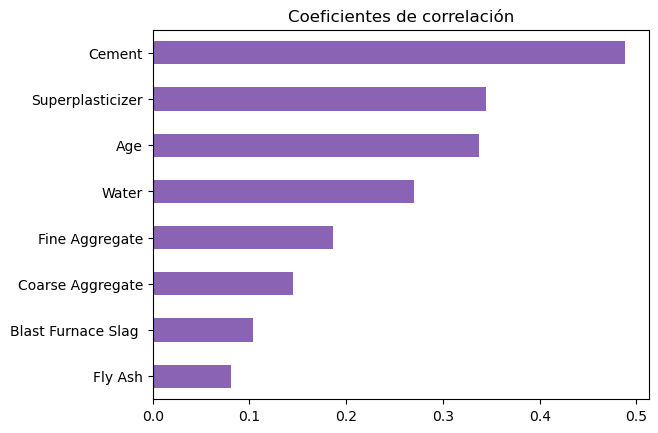

Características más relevantes: 

Cement              0.488283
Superplasticizer    0.344209
Age                 0.337367
Water               0.269624
dtype: float64


In [20]:
# Plot de la correlación de Pearson entre variables independientes y variable dependiente
correlation_with_y = correlation_with_y.sort_values(ascending=True)
correlation_with_y.plot(kind='barh', color='#8a63b4')

plt.title("Coeficientes de correlación")
plt.show()

print(f"Características más relevantes: \n\n{selected_features}")

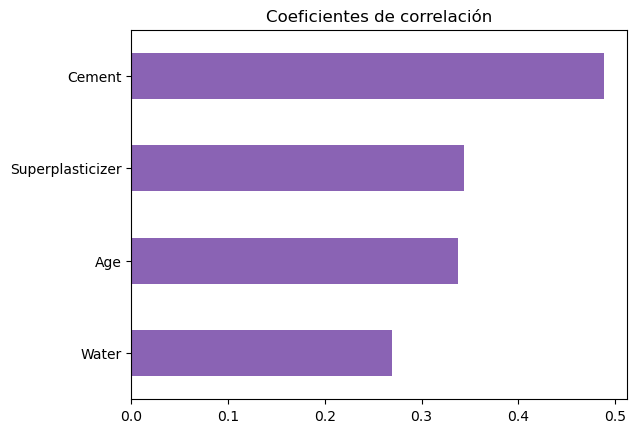

In [21]:
selected_features = selected_features.sort_values(ascending=True)
selected_features.plot(kind='barh', color='#8a63b4')

plt.title("Coeficientes de correlación")
plt.show()

<font color='olive'> **_X_max_CCP_:** </font> Guardamos la variable con mayor coeficiente de correlacción de Pearson en la variable _X_max_CCP_.

In [22]:
X_max_CCP = pd.DataFrame(X['Cement'])

Generamos un gráfico de dispersión de las cuatro variables independientes más relevantes respecto a la variable dependiente. 

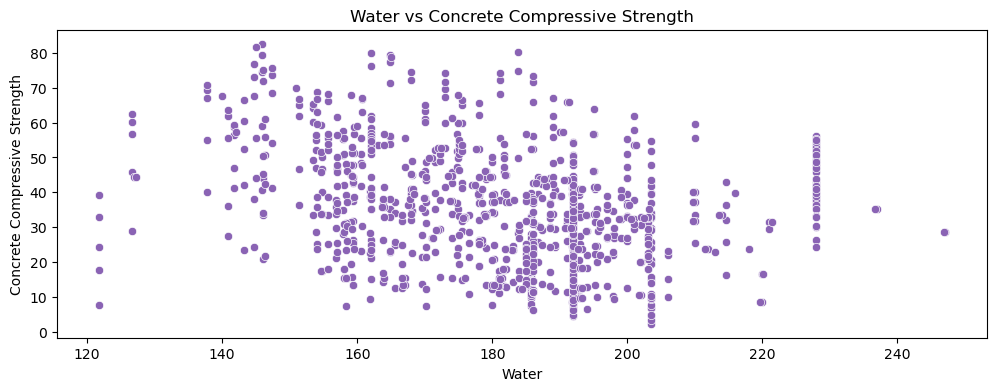

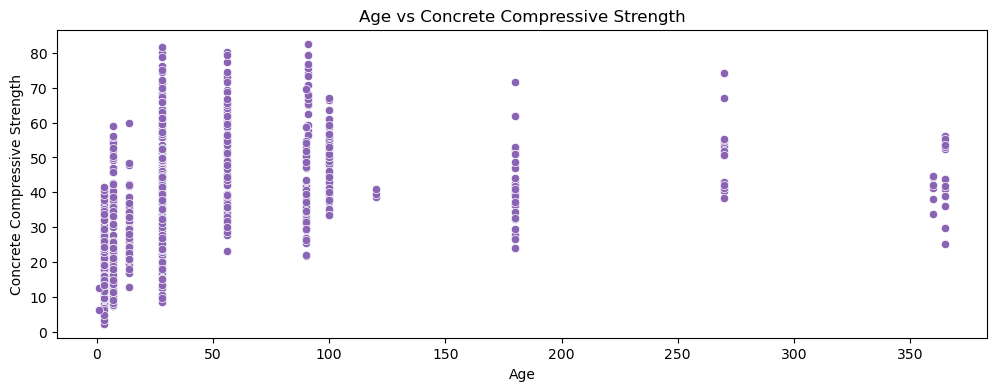

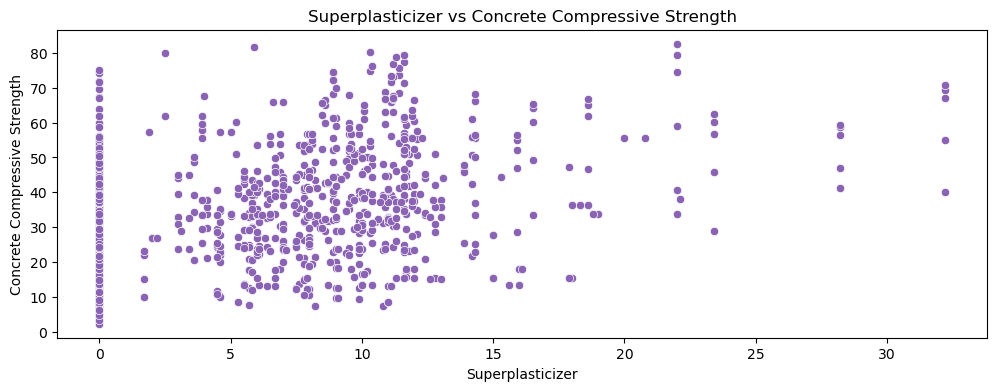

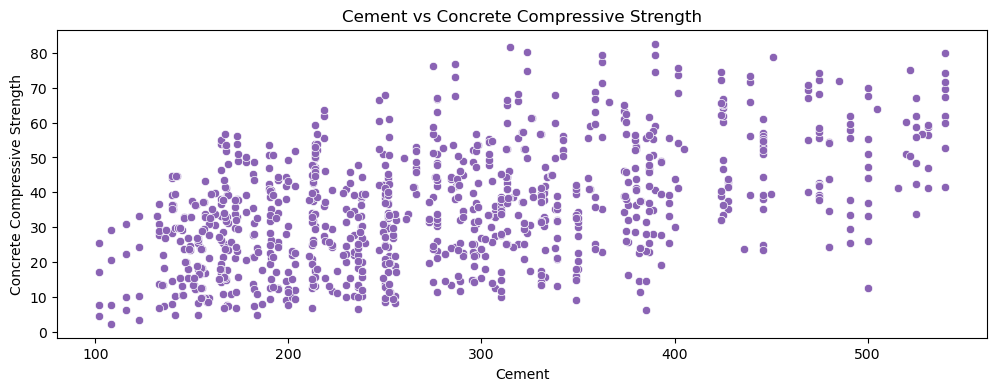

In [23]:
for feature_name in selected_features.index:
    fig, ax = plt.subplots(figsize=(12, 4))
    sns.scatterplot(x=X[feature_name], y=y, ax=ax, color='#8a63b4')
    plt.title(f'{feature_name} vs Concrete Compressive Strength')
    plt.show()

Ahora seleccionaremos las cuatro variables independientes más relevantes y crearemos términos de interacción que admitan relaciones no aditivas para todas las posibles combinaciones entre dichas variables. En este caso, dado que cada variable representa la cantidad de un material determinado en una mezcla por metro cúbico, la interacción entre ellas puede representarse como una multiplicación. Por ejemplo, si tenemos

$$Interaction = Cement \times Water$$

Esta expresión reflejaría cómo la cantidad de agua puede interactuar con la cantidad de cemento en la mezcla para afectar la resistencia a la compresión del concreto. En el caso de la variable _Age_, su interacción con alguna otra variable, como _Cement_, reflejaría cómo la cantidad de cemento y los días de edad del concreto pueden interactuar y afectar la resistencia a la compresión en una relación no aditiva. La creación de términos de interacción permite capturar relaciones complejas y no lineales entre las variables independientes, lo que puede mejorar la capacidad del modelo de regresión para ajustarse a los datos y realizar predicciones más precisas.

Crearemos seis dataframes con las seis posibles combinaciones de interacciones entre _'Cement'_, _'Superplasticizer'_, _'Age'_ y _'Water'_.

In [24]:
# Lista de todas las variables se
selected_features_names = selected_features.index

# Inicializa una lista para almacenar las DataFrames de interacciones
X_int_list = []

# Se generan las columnas de la interacción (nombre y valor)
interactions = []
interaction_names = []

# Genera todas las combinaciones de pares de variables
for var1, var2 in combinations(selected_features_names, 2):
    interaction = X[var1] * X[var2]  # Realiza la multiplicación entre las columnas
    interaction_name = f"{var1} * {var2}"  # Nombre de la nueva columna de interacción
    interactions.append(interaction)
    interaction_names.append(interaction_name)
    
    # Crea un nuevo DataFrame de interacción y agrega la columna de interacción
    X_int = X.copy()
    X_int[interaction_name] = interaction
    
    X_int_list.append(X_int)  # Agrega el DataFrame de interacción a la lista

# Muestra los DataFrames resultantes con las nuevas columnas de interacción
for i, X_int in enumerate(X_int_list, 1):
    print(f"DataFrame {i} con interacción {interaction_names[i-1]}:")
    display(X_int.head())

DataFrame 1 con interacción Water * Age:


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Water * Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,4536.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,4536.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,61560.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,83220.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,69120.0


DataFrame 2 con interacción Water * Superplasticizer:


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Water * Superplasticizer
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,405.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,405.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0.0


DataFrame 3 con interacción Water * Cement:


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Water * Cement
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,87480.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,87480.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,75810.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,75810.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,38131.2


DataFrame 4 con interacción Age * Superplasticizer:


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Age * Superplasticizer
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,70.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,70.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0.0


DataFrame 5 con interacción Age * Cement:


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Age * Cement
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,15120.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,15120.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,89775.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,121362.5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,71496.0


DataFrame 6 con interacción Superplasticizer * Cement:


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Superplasticizer * Cement
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,1350.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,1350.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0.0


Ahora utilizaremos la técnica OLS (Ordinary Least Squares) para ajustar un modelo de regresión lineal y evaluar cómo diferentes variables independientes afectan el valor del coeficiente de determinación R².

El objetivo es determinar qué interacciones creadas tienen un impacto significativo en la capacidad del modelo para explicar la variabilidad en la variable dependiente. Aquellas interacciones que aumenten de manera sustancial el valor de R² se considerarán como las más influyentes en la predicción de la variable dependiente.

**Definamos una función** que permita calcular el valor de R² y el p-value tanto cuando se utilizan todas las variables independientes en un dataframe como cuando se obtienen los valores para cada variable independiente individualmente en el dataframe.

In [25]:
def ols_method(X):
    # Calculamos OLS para todas las variables independientes
    X_sm = sm.add_constant(X)
    model = sm.OLS(y,X_sm)
    results = model.fit()
    r_squared = results.rsquared
    p_value = results.pvalues[1]  # El valor p del estadístico t para la característica
    print("All Features\n" + f"R²: {r_squared:.4f}, p-value: {p_value:.4f}" + '\n')

    # Calculamos OLS para cada variable independiente
    for i in X.columns:
        X_sm = sm.add_constant(X[i])
        model = sm.OLS(y, X_sm)
        results = model.fit()
        r_squared = results.rsquared
        p_value = results.pvalues[1]  # El valor p del estadístico t para la característica
        print(f"Feature: {i}\nR²: {r_squared:.4f}, p-value: {p_value:.4f}")

Ahora, **definamos una función** para obtener el valor de R² y el valor p-value al utilizar todas las variables independientes en un dataframe.

In [26]:
def ols_method_general(X):
    X_sm = sm.add_constant(X)
    model = sm.OLS(y,X_sm)
    results = model.fit()
    r_squared = results.rsquared
    p_value = results.pvalues[1]  # El valor p del estadístico t para la característica
    print(f'All Original Features + {X.columns[-1]}\nR²: {r_squared:.4f}, p-value: {p_value:.4f}\n')

Obtengamos primero el valor de **R² y p-value** que se obtienen al utilizar todas las variables independientes originales. 

In [27]:
ols_method(X)

All Features
R²: 0.6039, p-value: 0.0000

Feature: Cement
R²: 0.2384, p-value: 0.0000
Feature: Blast Furnace Slag 
R²: 0.0107, p-value: 0.0010
Feature: Fly Ash
R²: 0.0065, p-value: 0.0105
Feature: Water
R²: 0.0727, p-value: 0.0000
Feature: Superplasticizer
R²: 0.1185, p-value: 0.0000
Feature: Coarse Aggregate
R²: 0.0209, p-value: 0.0000
Feature: Fine Aggregate
R²: 0.0348, p-value: 0.0000
Feature: Age
R²: 0.1138, p-value: 0.0000


Obtengamos ahora el valor de **R² y p-value** que se obtienen al utilizar todas las variables independientes originales más alguna combinación de interacción entre dos variables. 

In [28]:
for X_int in X_int_list:
    ols_method_general(X_int)

All Original Features + Water * Age
R²: 0.6431, p-value: 0.0000

All Original Features + Water * Superplasticizer
R²: 0.6136, p-value: 0.0000

All Original Features + Water * Cement
R²: 0.6040, p-value: 0.0000

All Original Features + Age * Superplasticizer
R²: 0.6722, p-value: 0.0000

All Original Features + Age * Cement
R²: 0.6111, p-value: 0.0000

All Original Features + Superplasticizer * Cement
R²: 0.6082, p-value: 0.0000



**Observaciones:**

+ Todas las interacciones propuestas tuvieron un valor de p < 0.05. Esto indica que el coeficiente es estadísticamente significativo y que existe una relación significativa entre la variable independiente y la variable dependiente.

+ Todas las interacciones propuestas tuvieron un valor de R² > 0.6039 (que es el valor de R² de las variables originales), lo que significa que agregarlas al conjunto de variables independientes mejoró la precisión del modelo.

<font color='olive'> **X_extracted:** </font> Guardamos las variables de interacción extraídas de las variables originales en la variable _X_extracted_. 

In [29]:
X_extracted = {}
for i, interaction in enumerate(interactions):
    X_extracted[interaction_names[i]] = interaction
    
X_extracted = pd.DataFrame(X_extracted)

Creamos los **gráficos de dispersión** de las seis nuevas variables independientes respecto a la variable dependiente.

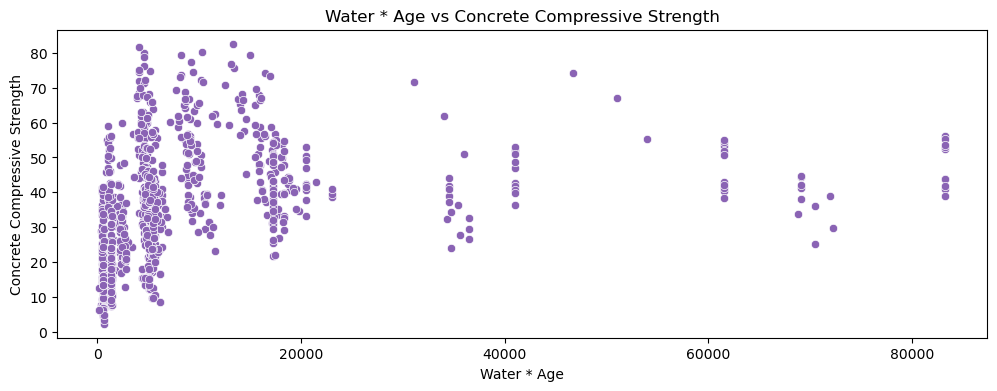

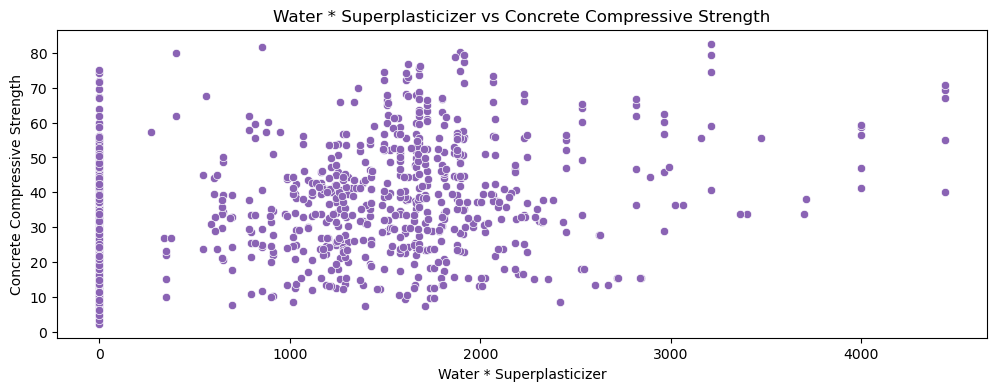

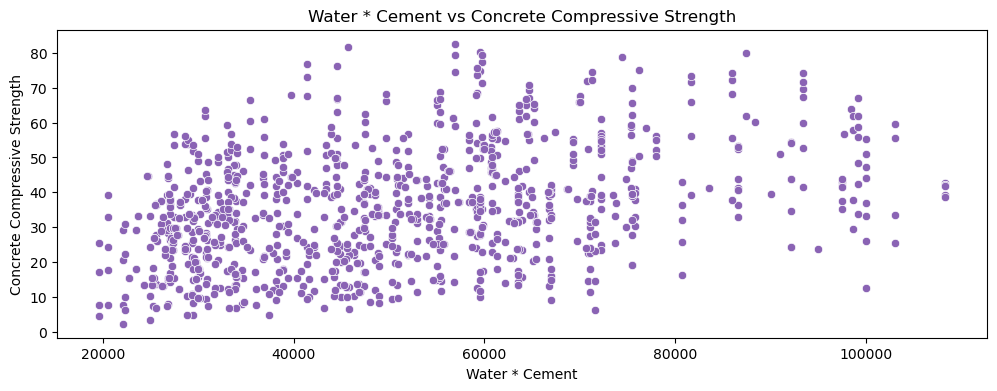

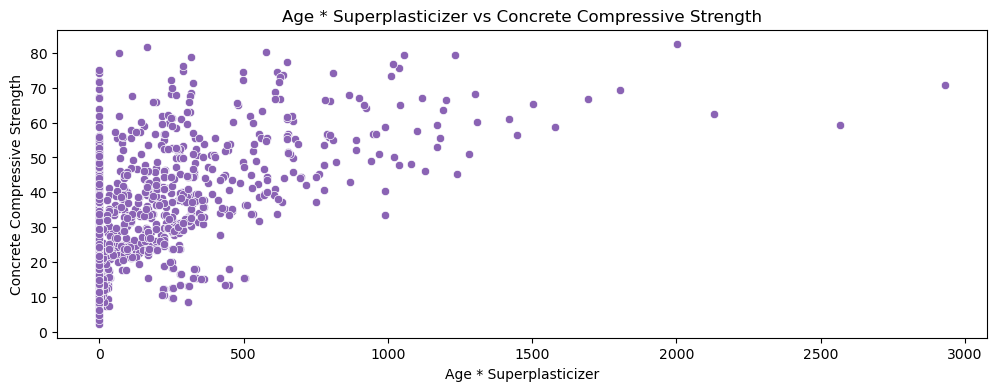

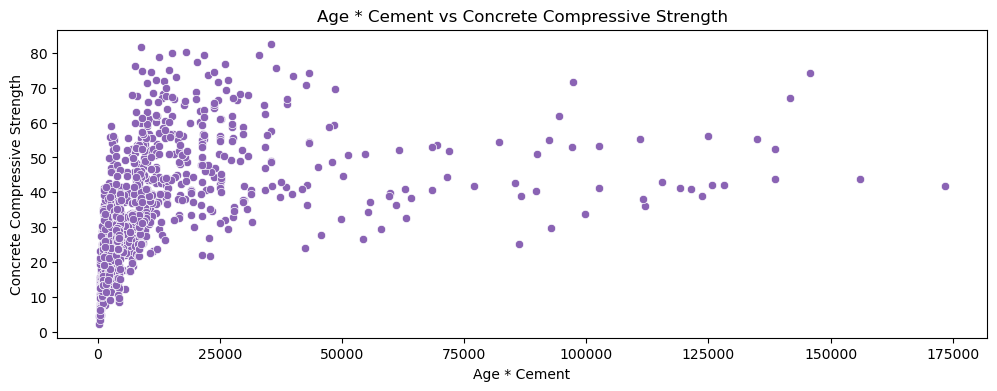

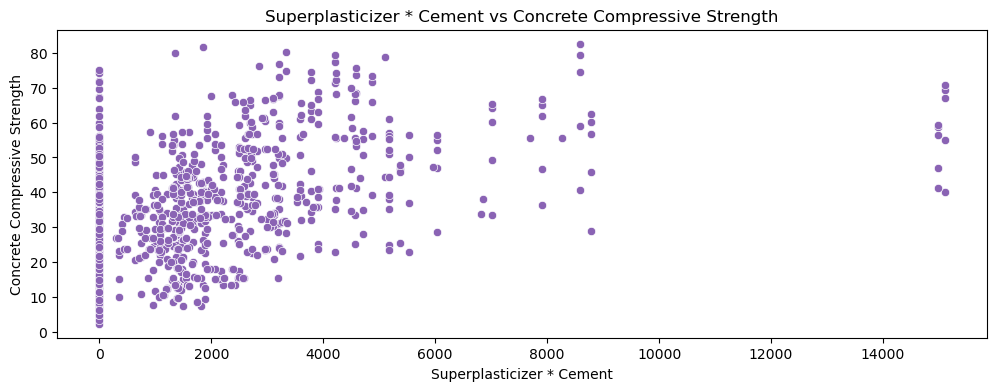

In [30]:
# Se generan los gráficos de dispersión
for name in interaction_names:
    fig, ax = plt.subplots(figsize=(12, 4))
    sns.scatterplot(x=X_extracted[name], y=y, ax=ax, color='#8a63b4')
    plt.title(f"{name} vs Concrete Compressive Strength")
    plt.show()

Creamos un nuevo DataFrame con las variables independientes originales más las nuevas variables de interacción extraídas.

In [31]:
# Se crea un DataFrame con X + las nuevas columnas de interacción
X_total_int = X.copy()
for i, interaction in enumerate(interactions):
    X_total_int[interaction_names[i]] = interaction

Obtengamos ahora el valor de **R² y p-value** que se obtienen al utilizar todas las variables independientes originales más todas las variables de interacción extraídas. 

In [32]:
ols_method(X_total_int)

All Features
R²: 0.6902, p-value: 0.0000

Feature: Cement
R²: 0.2384, p-value: 0.0000
Feature: Blast Furnace Slag 
R²: 0.0107, p-value: 0.0010
Feature: Fly Ash
R²: 0.0065, p-value: 0.0105
Feature: Water
R²: 0.0727, p-value: 0.0000
Feature: Superplasticizer
R²: 0.1185, p-value: 0.0000
Feature: Coarse Aggregate
R²: 0.0209, p-value: 0.0000
Feature: Fine Aggregate
R²: 0.0348, p-value: 0.0000
Feature: Age
R²: 0.1138, p-value: 0.0000
Feature: Water * Age
R²: 0.0845, p-value: 0.0000
Feature: Water * Superplasticizer
R²: 0.1000, p-value: 0.0000
Feature: Water * Cement
R²: 0.1387, p-value: 0.0000
Feature: Age * Superplasticizer
R²: 0.2522, p-value: 0.0000
Feature: Age * Cement
R²: 0.1438, p-value: 0.0000
Feature: Superplasticizer * Cement
R²: 0.1900, p-value: 0.0000


**Observaciones:**

+ Todas las variables tienen valores de p < 0.05, lo que significa que existe una relación significativa entre cada variable independiente y la variable dependiente. Por lo tanto, las características extraídas son relevantes para el modelo.

+ El valor de R² fue de 0.6902, lo que representa un aumento significativo en comparación con el valor de R² obtenido con los datos originales (0.6039). Esto indica que la inclusión de las variables extraídas en el conjunto de variables independientes mejora la precisión del modelo.

+ Por las observaciones anteriores vale la pena evaluar la eficacia de dicho conjunto para predecir a la variable dependiente.

<font color='olive'> **_X_plus_extracted_:** </font> Guardamos las variables originales más las variables de interacción extraídas en la variable _X_plus_extracted_. 

In [33]:
X_plus_extracted = X_total_int

#### <font color='purple'> **2.3. Selección de características** </font> 

Procedemos a trabajar con un nuevo DataFrame que contiene todas las variables independientes disponibles, tanto las originales como las extraídas.

In [34]:
df2 = pd.concat([X_plus_extracted, y], axis=1)

Separamos las variables independientes de la variable dependiente.

In [35]:
X = df2.drop('Concrete Compressive Strength', axis=1)  # Variables dependientes
y = df2['Concrete Compressive Strength']  # Variable independiente

<font color='navy'> **2.3.1 Correlación de Pearson** </font>

Observemos la nueva **matriz de correlación de Pearson**.

<Axes: >

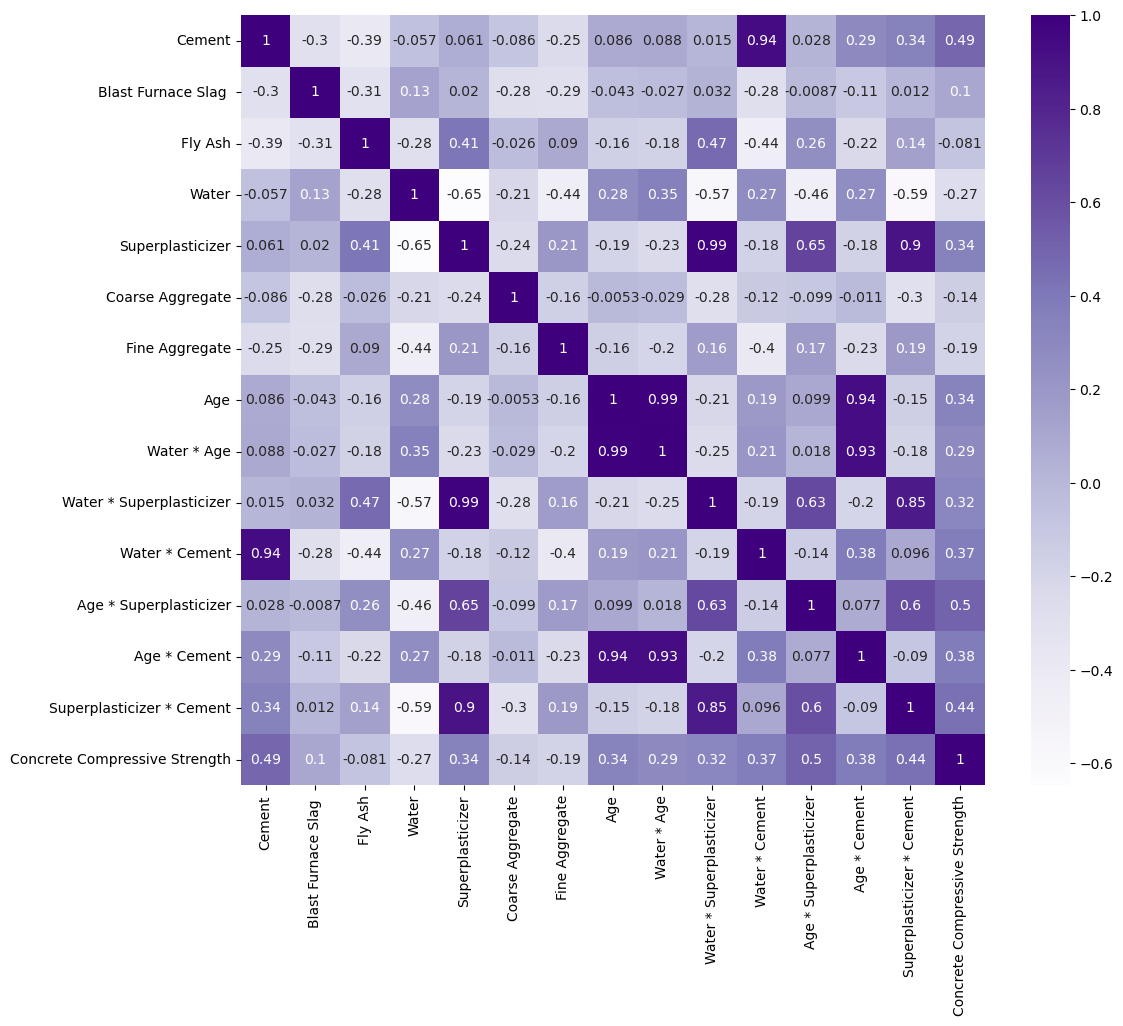

In [36]:
cor = df2.corr()

plt.figure(figsize=(12,10))

colormap = sns.color_palette("Purples", as_cmap=True)
sns.heatmap(cor, annot=True, cmap=colormap)

Obtenemos los **coeficientes de correlación** de cada variable independiente respecto a la variable dependiente.

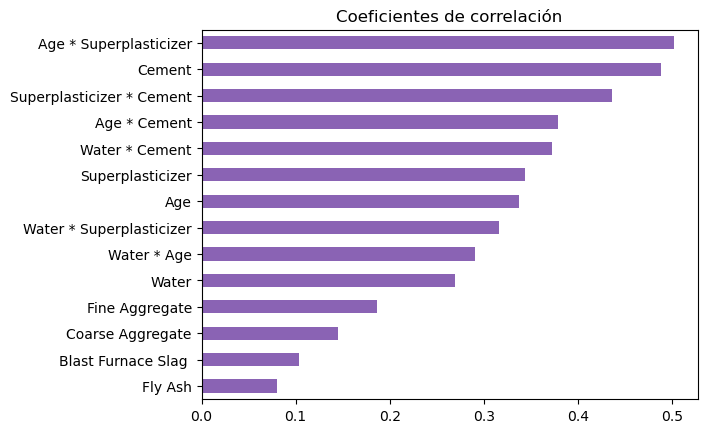

In [37]:
# Se obtiene la matriz de correlación
correlation_with_y = X.corrwith(y)

# Plot de la correlación de Pearson entre variables independientes y variable dependiente
correlation_with_y = correlation_with_y.abs().sort_values(ascending=True)
correlation_with_y.plot(kind='barh', color='#8a63b4')

plt.title("Coeficientes de correlación")
plt.show()

Filtramos las 3 con coeficientes más grandes.

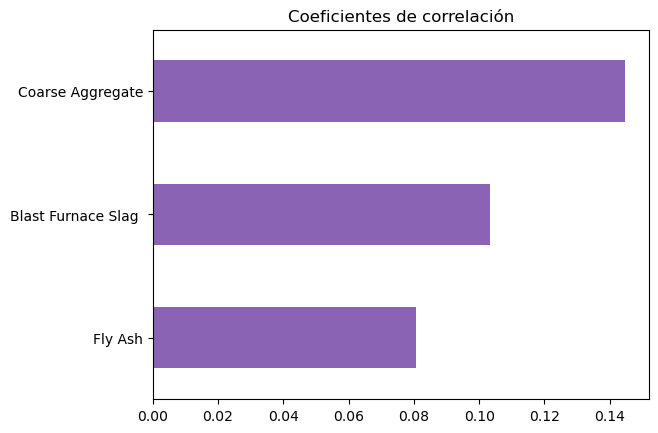

Características más relevantes: 

Coarse Aggregate       0.144717
Blast Furnace Slag     0.103374
Fly Ash                0.080648
dtype: float64


In [38]:
# Se seleccionan las 3 variables con coeficientes más grandes
filtered_features = correlation_with_y.head(3)

# Plot de la correlación de Pearson entre variables independientes y variable dependiente
filtered_features = filtered_features.sort_values(ascending=True)
filtered_features.plot(kind='barh', color='#8a63b4')
plt.title("Coeficientes de correlación")
plt.show()

filtered_features = filtered_features.sort_values(ascending=False)
print(f"Características más relevantes: \n\n{filtered_features}")

<font color='olive'> **_X_max_CCP_extracted_:** </font> Guardamos la variable con mayor coeficiente de correlacción de Pearson en la variable _X_max_CCP_extracted_.

In [39]:
X_max_CCP_extracted = pd.DataFrame(X['Age * Superplasticizer'])

<font color='navy'> **2.3.2 Selección Hacia Adelante** </font>

Obtengamos un último conjunto de variables dependientes utilizando el método de selección hacia adelante.

In [40]:
model = HistGradientBoostingRegressor()

#Selección hacia adelante
ffs = SequentialFeatureSelector(model, k_features='best', forward = True)

ffs.fit(X, y)
features = list(ffs.k_feature_names_)
X_features = pd.DataFrame({'Atributos': features})
print('Características más relevantes')
display(X_features)

Características más relevantes


,Atributos
0,Blast Furnace Slag
1,Fly Ash
2,Water
3,Age
4,Water * Age
5,Water * Cement
6,Age * Cement


<font color='olive'> **_X_ffs_:** </font> Guardamos las variables obtenidas con el método de  Selección Hacia Adelante en la variable _X_ffs_.

In [41]:
#Guardamos las variables seleccionadas en X_selected
X_ffs = X[X_features['Atributos']]

### <font color='navy'> **3. Selección del conjunto de variables independientes y el modelo más eficaz** </font> 

A lo largo del notebook, hemos estado guardando las variables independientes en cada etapa de procesamiento con el propósito de determinar la combinación de variables independientes que logre un mejor ajuste del modelo de regresión lineal.

Ahora procedemos a evaluar cada conjunto de datos mediante la validación cruzada k-fold.

#### <font color='purple'> **3.1 Evaluación de _X_original_** </font> 

Definamos una función que haga una validación cruzada para el modelo de regresión lineal.

In [42]:
def cross_validation_lr(X):
    
    model = LinearRegression()
    model = model.fit(X,y)
    r2_scores = cross_val_score(model, X, y, cv=5)
    r2_mean = r2_scores.mean()

    print(f" Regresión Lineal \nR²: {r2_mean}\n")

Obtengamos el valor de R² al utilizar las variables independientes originales.

In [43]:
cross_validation_lr(X_original)

 Regresión Lineal 
R²: 0.47680010562839037



**Observaciones:**
+ Un valor de R² de 0.4768 indica que el modelo tiene un ajuste moderado, ya que explica menos del 50% de la variabilidad en los datos. Esto sugiere la necesidad de explorar modelos más complejos que puedan explicar mejor esta variabilidad.

Tomaremos las variables **_X_original_** y el modelo de **Regresión Lineal** como nuestra base.

Basándonos en la observación anterior, procederemos a evaluar el conjunto de variables independientes con otros modelos de regresión más complejos. Los modelos que evaluaremos son los siguientes:

1. **Regresión Lineal**
2. **Lasso Regularization:** Esta técnica combina la regresión lineal con la penalización de características, lo que resulta en modelos más simples y con una selección automática de características.
3. **Gradient Boosting:** Es utilizado tanto para regresión como para clasificación y se destaca en el ajuste de datos que no pueden modelarse adecuadamente mediante un único modelo de regresión lineal.

Para esto, definiremos la siguiente función que nos proporcionará los resultados de la validación cruzada para cada modelo.

In [44]:
def cross_validation_regression_models(X):
    
    #Otros modelos de regresión
    models = {
        'Linear': LinearRegression(),
        'Lasso': Lasso(alpha=20), 
        'Gradient Boosting': GradientBoostingRegressor(),
    }

    #Evaluamos el rendimiento de cada modelo.
    for model_name, model in models.items():
        
        model = model.fit(X,y)
        r2_scores = cross_val_score(model, X, y, cv=5)
        r2_mean = r2_scores.mean()

        print(f"{model_name}\nR²: {r2_mean}\n")

In [45]:
cross_validation_regression_models(X_original)

Linear
R²: 0.47680010562839037

Lasso
R²: 0.4801137511826722

Gradient Boosting
R²: 0.48312028510196753



**Observaciones:**

+ Obtuvimos resultados similares a pesar de utilizar modelos más complejos; sin embargo, la ligera mejora presentada hace que valga la pena evaluarlos para cada conjunto de variables.

+ El coeficiente de determinación más alto (0.4801) se obtiene al utilizar el modelo **_Lasso Regularization_.**

#### <font color='purple'> **3.2 Evaluación de X_max_CCP** </font> 

La variable _X_max_CCP_ contiene a la variable independiente (_Cement_) con el mayor coeficiente de correlación de Pearson respecto a la variable dependiente. Obtengamos el valor de R² al utilizar esta variable independiente.

In [46]:
cross_validation_regression_models(X_max_CCP)

Linear
R²: 0.07487782797863851

Lasso
R²: 0.07539748525399873

Gradient Boosting
R²: -0.05736759403394298



**Observaciones:**

+ Los resultados obtenidos no son prometedores, lo cual sugiere que una variable independiente original por sí sola no es suficiente para predecir la variable dependiente.

#### <font color='purple'> **3.3 Evaluación de X_extracted** </font> 

La variable _X_extracted_ contiene a las variables de interacción extraídas durante el procedimiento de extracción de características. Obtengamos el valor de R² al utilizar este conjunto de variables independientes.

In [47]:
cross_validation_regression_models(X_extracted)

Linear
R²: 0.16394629178520873

Lasso
R²: 0.17533005663883472

Gradient Boosting
R²: 0.4112206083098423



**Observaciones:**

+ El modelo de Gradient Boosting obtuvo los mejores resultados para este conjunto de variables independientes. Sin embargo, se obtuvieron mejores resultados al utilizar el conjunto de variables originales junto con el modelo de Regresión Lineal. Esto sugiere que este conjunto de variables no es óptimo para explicar la variabilidad de los datos.

#### <font color='purple'> **3.4 Evaluación de X_plus_extracted** </font> 

La variable X_plus_extracted contiene a las variables independientes originales más las variables de interacción extraídas durante el procedimiento de extracción de características. Obtengamos el valor de R² al utilizar este conjunto de variables independientes.

In [48]:
cross_validation_regression_models(X_plus_extracted)

Linear
R²: 0.40995247736861823

Lasso
R²: 0.4139403947666624

Gradient Boosting
R²: 0.5283400077695051



**Observaciones:**

+ Para este conjunto de variables y el modelo Gradiente Boosting, hemos obtenido el coeficiente de determinación más alto (0.5283) hasta el momento. Esto nos sugiere dos posibles escenarios:
    1) Las variables originales junto con las variables extraídas, en conjunto, explican una mayor variabilidad de los datos.
    2) Un conjunto que es una mezcla de variables originales y extraídas explica una mayor variabilidad de los datos.

#### <font color='purple'> **3.5 Evaluación de X_max_CCP_extracted** </font> 

La variable X_max_CCP_extracted contiene a la variable de interacción extraída con el coeficiente de Pearson más alto respecto a la variable dependiente. Obtengamos el valor de R² al utilizar esta variable independiente.

In [49]:
cross_validation_regression_models(X_max_CCP_extracted)

Linear
R²: 0.08464937251868432

Lasso
R²: 0.08492806302480012

Gradient Boosting
R²: -0.08502390516281629



**Observaciones:**

+ Al igual que en el caso de la variable _X_max_CCP_, los resultados obtenidos con la variable _X_max_CCP_extracted_ no son prometedores. Esto implica que una variable de interacción por sí sola no es suficiente para predecir la variable dependiente.

#### <font color='purple'> **3.6 Evaluación de X_ffs** </font> 

La variable X_ffs contiene las variables seleccionadas al utilizar el método de Selección Hacia Adelante en el conjunto de variables independientes originales y las extraídas. Obtengamos el valor de R² al utilizar estas variables independientes.

In [50]:
cross_validation_regression_models(X_ffs)

Linear
R²: 0.4048117000743453

Lasso
R²: 0.4490335092454985

Gradient Boosting
R²: 0.7252031785561621



**Observaciones:**

+ El modelo Gradient Boosting ha obtenido el valor más alto del coeficiente de determinación hasta el momento (0.7252), lo que confirma que cuando se toma un conjunto de variables independientes que es una mezcla de variables originales y extraídas, se explica una mayor variabilidad de los datos. Esto coincide con el segundo caso que se planteó en las observaciones de _X_plus_extracted_.

#### <font color='purple'> **3.7 Selección final de variables independientes y modelo más eficaz** </font> 

Con base en el análisis anterior, podemos concluir que las variables independientes _X_ffs_ junto con el modelo _Gradient Boosting_ proporcionan una mejor explicación de la variabilidad de los datos, ya que obtienen el coeficiente de determinación más alto. 

Por lo tanto, procedemos a construir el modelo final utilizando _Gradient Boosting_ y el conjunto de variables independientes _X_ffs_.

### <font color='navy'> **4. Construcción de los modelos** </font> 

#### <font color='purple'> **4.1. Partición de datos en datos de entrenamiento y datos de prueba** </font> 

Realizamos la partición *Hold Out*, la cual divide los datos aleatoriamente en dos conjuntos independientes: el conjunto de entrenamiento y el conjunto de prueba.

Hacemos dos particiones distintas, una para el modelo base que utiliza las variables _X_original_, y otra para el modelo final, que utiliza las variables _X_ffs_.

In [51]:
#Se realiza la partición Hold Out para el caso base (80% para entrenamiento y un 20% para prueba).
train_input_b, test_input_b, train_output_b, test_output_b = train_test_split(X_original, y, 
                                                                      test_size = 0.2, 
                                                                      random_state = 24)

#Se realiza la partición Hold Out caso final (80% para entrenamiento y un 20% para prueba).
train_input_f, test_input_f, train_output_f, test_output_f = train_test_split(X_ffs, y, 
                                                                      test_size = 0.2, 
                                                                      random_state = 24)

#### <font color='purple'> **4.2. Construcción del modelo base** </font> 

Procedemos a la contrucción y ajuste del modelo.

In [52]:
lr = LinearRegression()
lr = lr.fit(train_input_b, train_output_b)

print(lr.score(train_input_b, train_output_b))

0.6081570410971748


Predicción sobre datos de prueba.

In [53]:
y_pred_b = lr.predict(test_input_b)

#### <font color='purple'> **4.3. Construcción del modelo final** </font> 

Procedemos a la contrucción y ajuste del modelo.

In [54]:
gb = GradientBoostingRegressor()
gb = gb.fit(train_input_f, train_output_f)

print(gb.score(train_input_f, train_output_f))

0.9431368926836484


Predicción sobre datos de prueba.

In [55]:
y_pred_f = gb.predict(test_input_f)

### <font color='navy'> **5. Evaluación de los modelos** </font> 

Una vez que el modelo ha sido entrenado se usan los datos de prueba para evaluar cómo se desempeñan los modelos en datos que nunca ha visto antes. Esto se hace para obtener una evaluación más completa de su capacidad para generalizar a nuevos datos.

#### <font color='purple'> **5.1. K-fold cross validation** </font> 

La validación cruzada en los datos de entrenamiento es una etapa del proceso de evaluación del modelo que ayuda a estimar cómo se desempeñaría el modelo en datos no vistos que son similares a los datos de entrenamiento. Es decir, evalúa la capacidad de generalización de un modelo. Se realiza después del entrenamiento del modelo y antes de su evaluación final en el conjunto de prueba. La validación cruzada es útil cuando se tiene un conjunto de datos pequeño y se desea obtener una evaluación más robusta y confiable del rendimiento del modelo.

La forma más común de validación es la _"k-fold cross-validation"_, donde los datos se dividen en _k_ particiones aproximadamente iguales. Luego, el modelo se entrena _k_ veces, utilizando una partición diferente como conjunto de prueba en cada iteración y las demás particiones como conjunto de entrenamiento. El rendimiento del modelo se promedia sobre todas las iteraciones para obtener una estimación general del rendimiento.

<font color='navy'> **5.1.1 K-fold cross validation en el modelo base** </font> 

In [56]:
lr = LinearRegression()
lr.fit(train_input_b, train_output_b)

r2_scores = cross_val_score(lr, train_input_b, train_output_b, cv=5)
r2_mean = r2_scores.mean()

print(f"Regresión Lineal\nR²: {r2_mean}\n")

Regresión Lineal
R²: 0.5932003938882662



**Observaciones:**

+ Hemos obtenido un valor de R² de 0.5932 lo cual sugiere que el modelo de Regresión Lineal es capaz de explicar una parte significativa de la variabilidad en los datos, pero se podría encontrar un modelo que obtenga mejores resultados al hacer predicciones más precisas o explicar una mayor cantidad de variabilidad en los datos.

<font color='navy'> **5.1.2 K-fold cross validation en el modelo final** </font> 

Probemos ahora a evaluar el modelo de _Gradient Boosting_ mediante validación cruzada.

In [58]:
#Gradient Boosting mean cross-validation
gb = GradientBoostingRegressor()
gb.fit(train_input_f, train_output_f)

r2_scores = cross_val_score(gb, train_input_f, train_output_f, cv=5)
r2_mean = r2_scores.mean()

print(f"Gradient Boosting\nR²: {r2_mean}\n")

Gradient Boosting
R²: 0.8801817428454928



**Observaciones:**

+ Hemos obtenido un valor de R² de 0.8801, el cual sugiere que el modelo de Gradient Boosting tiene un buen desempeño en la explicación de la variabilidad en los datos de la variable dependiente y está haciendo predicciones bastante precisas. Además, el modelo de Gradient Boosting supera significativamente al modelo base de Regresión Lineal (0.5932) por lo que el modelo Gradient Boosting es una elección más óptima para este conjunto de datos en particular en comparación con un modelo de Regresión Lineal.

#### <font color='purple'> **5.2. Métricas de evaluación** </font> 

Se evaluarán ahora los modelos utilizando el conjunto de prueba con base en las siguientes métricas:

+ **Error Cuadrático Medio (MSE):** El MSE calcula el promedio de los errores al cuadrado entre las predicciones y los valores reales. Puede ser útil para penalizar errores grandes, ya que eleva al cuadrado las diferencias. Un MSE más bajo indica un mejor ajuste del modelo.

+ **Raíz del Error Cuadrático Medio (RMSE):** El RMSE se calcula de la siguiente manera: para cada observación en el conjunto de datos, se calcula el cuadrado de la diferencia entre la predicción del modelo y el valor real (residual al cuadrado). Luego, se promedian todos los residuos al cuadrado. Finalmente, se toma la raíz cuadrada del valor promedio de los residuos al cuadrado para obtener el RMSE.

+ **Error Absoluto Medio (MAE):** El MAE mide el promedio de las diferencias absolutas entre las predicciones del modelo y los valores reales. Cuanto más bajo sea el MAE, mejor será el modelo en términos de precisión.

+ **Coeficiente de Determinación (R²):** R² representa la proporción de la variabilidad en la variable dependiente que es explicada por el modelo. R² varía de 0 a 1, donde 0 indica que el modelo no explica ninguna variabilidad y 1 indica un ajuste perfecto. Un R² más alto es deseable, pero es importante considerar otras métricas junto con R².


<font color='navy'> **5.2.1 Métricas del modelo base** </font> 

In [59]:
print('Regresión Lineal')
print(f'MSE: {mean_squared_error(test_output_b,y_pred_b)}')
print(f'RMSE: {np.sqrt(mean_squared_error(test_output_b,y_pred_b))}')
print(f'MAE: {mean_absolute_error(test_output_b,y_pred_b)}')
print(f'R²: {r2_score(test_output_f,y_pred_b)}')

Regresión Lineal
MSE: 111.48289381369645
RMSE: 10.558546008504033
MAE: 8.110695197264631
R²: 0.5748912020343622


Se muestra el gráfico de dispersión de la variable dependiente predicha y la variable dependiente de prueba.

Text(0.5, 1.0, 'Regresión Lineal')

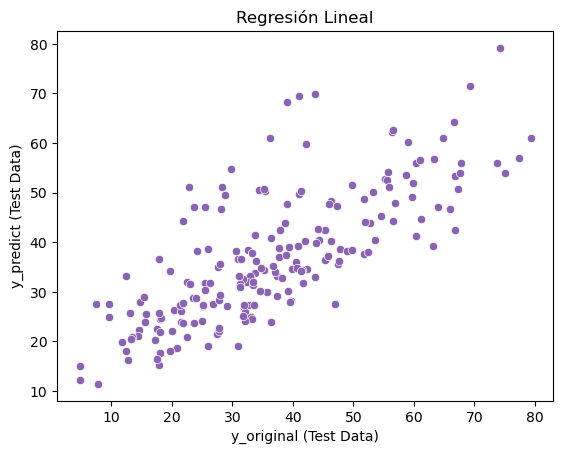

In [60]:
y_train_plot = pd.DataFrame({"y_predict (Test Data)" : y_pred_b.squeeze(), 
                           "y_original (Test Data)" : test_output_b.squeeze()})
sns.scatterplot(data = y_train_plot, 
                x = "y_original (Test Data)",
                y = "y_predict (Test Data)",
                color='#8a63b4')
plt.title("Regresión Lineal")

**Observaciones:**

+ El modelo de Regresión Lineal tiene un MSE relativamente alto, lo que indica que tiene errores cuadráticos promedio más grandes en sus predicciones. Sin embargo, el RMSE y el MAE son más bajos, lo que sugiere que los errores absolutos en las predicciones son menores. El valor de R² (0.5748) indica que el modelo explica parte de la variabilidad en los datos, pero no la totalidad.

+ El gráfico de dispersión muestra claramente cómo, en efecto, el modelo explica parte de la variabilidad en los datos.

<font color='navy'> **5.2.2 Métricas del modelo final** </font> 

In [61]:
print('Gradient Boosting')
print(f'MSE: {mean_squared_error(test_output_f,y_pred_f)}')
print(f'RMSE: {np.sqrt(mean_squared_error(test_output_f,y_pred_f))}')
print(f'MAE: {mean_absolute_error(test_output_f,y_pred_f)}')
print(f'R²: {r2_score(test_output_f,y_pred_f)}')

Gradient Boosting
MSE: 30.187987012272774
RMSE: 5.494359563431645
MAE: 4.192620934387249
R²: 0.8848865648102424


Se muestra el gráfico de dispersión de la variable dependiente predicha y la variable dependiente de prueba.

Text(0.5, 1.0, 'Gradient Boosting')

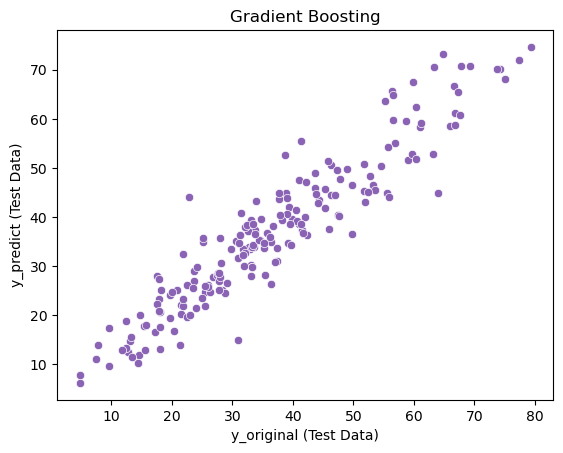

In [62]:
y_train_plot = pd.DataFrame({"y_predict (Test Data)" : y_pred_f.squeeze(), 
                           "y_original (Test Data)" : test_output_f.squeeze()})
sns.scatterplot(data = y_train_plot, 
                x = "y_original (Test Data)",
                y = "y_predict (Test Data)",
                color='#8a63b4')
plt.title("Gradient Boosting")

**Observaciones:**

+ Las métricas obtenidas con el modelo de Gradient Boosting muestran que tiene un buen ajuste a los datos, con un bajo MSE y MAE, y un alto valor de R², lo que sugiere que es un modelo eficaz para predecir la variable dependiente en función de datos nuevos.

+ El gráfico de dispersión muestra una clara semejanza a una línea recta, lo cual confirma que el modelo predice eficazmente la resistencia a la compresión del concreto.

+ El modelo Gradient Boosting supera claramente al modelo de Regresión Lineal en todas las métricas de evaluación.

+ El Gradient Boosting tiene un coeficiente de determinación R² mucho más alto (0.8848) en comparación con el de la Regresión Lineal (0.5748), lo que indica que el Gradient Boosting es mucho mejor para explicar la variabilidad en los datos y hacer predicciones más precisas.
    
+ El MSE y RMSE del Gradient Boosting son considerablemente más bajos que los de la Regresión Lineal, lo que significa que el Gradient Boosting comete menos errores en sus predicciones.
    El MAE del Gradient Boosting también es menor, lo que indica que, en promedio, las predicciones del modelo Gradient Boosting están más cerca de los valores reales que las de del modelo de Regresión Lineal.

De las evaluaciones anteriores, el modelo de Gradient Boosting supera claramente al modelo de Regresión Lineal en todas las métricas de evaluación. Proporciona predicciones más precisas y se ajusta mejor a los datos. Por lo tanto, se selecciona este modelo como el modelo de regresión que permite predecir la resistencia a la compresión del concreto, cumpliendo así con el objetivo del notebook.

In [63]:
y_pred = y_pred_f

### <font color='navy'> **Conclusiones** </font> 

Se realizó un análisis exploratorio de los datos en el que inicialmente no se observaba una relación lineal aparente con la variable dependiente. Las variables independientes del conjunto de datos describían la cantidad de kilogramos de ciertos materiales en una mezcla por metro cúbico (kg/m³), así como la edad de dicha mezcla. Debido a esto, se buscó extraer características al generar factores de interacción entre las variables independientes, las cuales, como su nombre indica, reflejan cómo la cantidad de una variable dada puede interactuar con la cantidad de otra variable para influir en la resistencia a la compresión del concreto. Se comprobó que agregar estas nuevas variables al conjunto de variables independientes mejoraba el ajuste del modelo.

Después del procesamiento de los datos, se evaluaron los diferentes conjuntos de variables independientes en varios modelos de regresión, con la finalidad de encontrar el conjunto de variables y el modelo que explicaban una mayor variabilidad en los datos. Como resultado, se obtuvo que el modelo Gradient Boosting, al utilizar las variables seleccionadas con el método de Selección Hacia Adelante, fue el que en conjunto obtuvo el coeficiente de determinación más alto.

Finalmente, al evaluar el modelo de regresión lineal con los datos de prueba, se obtuvo un coeficiente de determinación de 0.5748 y un error absoluto medio de 8.1106. Estos resultados sugieren que un modelo de regresión lineal no describe adecuadamente la relación entre los materiales y la resistencia a la compresión del concreto. Esta impresión se refuerza al observar una mejora significativa en el coeficiente de determinación (0.8848) y el error absoluto medio (4.1916) obtenidos al entrenar un modelo de Gradient Boosting. Por lo tanto, se seleccionó este modelo como el más adecuado para predecir la resistencia a la compresión del concreto.


### <font color='navy'> **Referencias** </font> 

+ Yeh, I.-C. (2007). _Concrete Compressive Strength Data Set_. UC Irvine Machine Learning Repository. https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength